In [1]:
import earthkit.data
import earthkit.plots
import earthkit.plots.quickplot as qplot
import earthkit.aggregate

earthkit.data.settings.set("cache-policy", "user")

/Users/mavj/opt/miniconda3/envs/DEVELOP/lib/python3.10/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


In [2]:
data = earthkit.data.from_source(
    "cds",
        'projections-cmip6',
    {
        'format': 'zip',
        'temporal_resolution': 'monthly',
        'experiment': 'historical',
        'variable': 'near_surface_air_temperature',
        'model': 'access_cm2',
        'year': [str(year) for year in range(1850, 2015)],
        'month': [
            '01', '02', '03',
            '04', '05', '06',
            '07', '08', '09',
            '10', '11', '12',
        ],
    },
)

2024-05-13 16:50:45,038 WARNING Unknown file type, no reader available. path=/var/folders/vt/7j2c2tmx4m14gn_sg3zpf5l00000gn/T/earthkit-data-mavj/cds-fa1b5c3b5139d4690476949ad4abe10a9da13ce801f3174f2b6c2b64394957b3.d/adaptor.esgf_wps.retrieve-1715610584.184916-9421-16-9d23938c-d7ee-485b-aa3a-8186ee05461e_provenance.png magic=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x18\xa5\x00\x00\x03\x1e\x08\x06\x00\x00\x00h\xfb\xe1\x7f\x00\x00\x00\x06bKGD\x00\xff\x00\xff\x00\xff\xa0\xbd\xa7\x93\x00\x00 \x00IDATx\x9c\xec\xddy' content_type=None


In [3]:
timeseries = earthkit.aggregate.spatial.reduce(data.to_xarray().tas)
yearly = earthkit.aggregate.temporal.resample(timeseries, frequency="Y")

/Users/mavj/opt/miniconda3/envs/DEVELOP/lib/python3.10/site-packages/xarray/core/groupby.py:534: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  index_grouper = pd.Grouper(


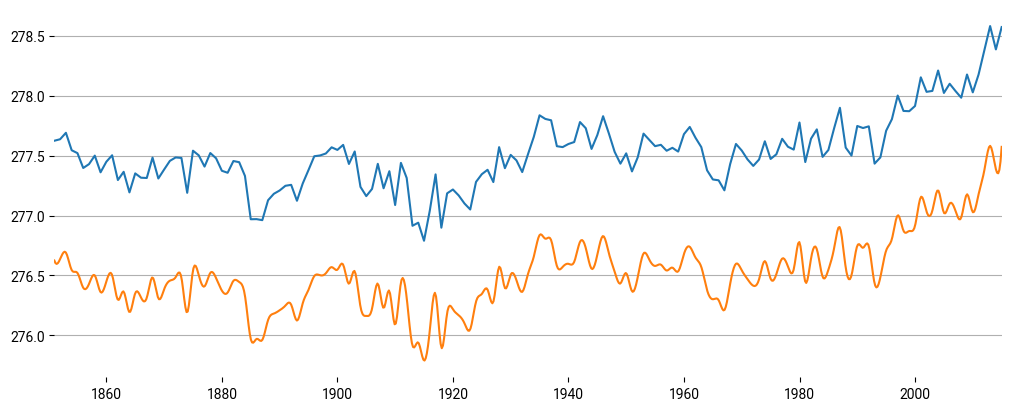

In [6]:
figure = earthkit.plots.Figure(size=(10, 4))
subplot = figure.add_subplot()
subplot.line(y=yearly.values, x=yearly.time.values, mode="linear")
subplot.line(y=yearly.values-1, x=yearly.time.values, mode="spline")
figure.show()

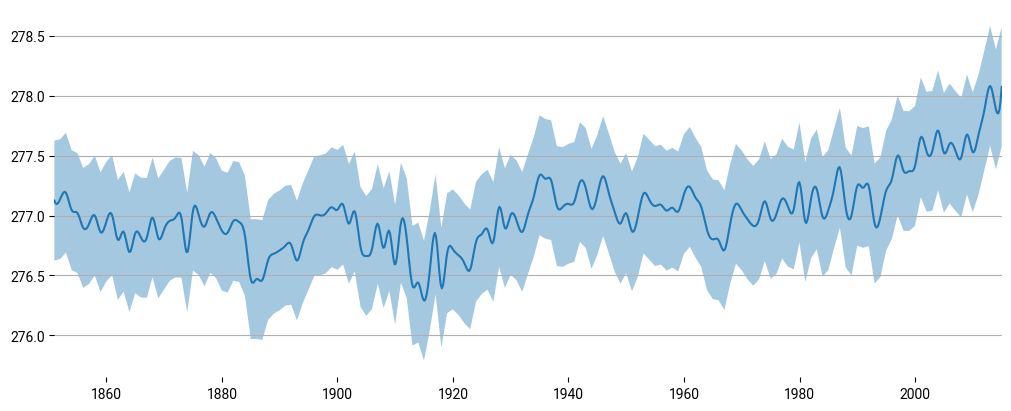

In [40]:
figure = earthkit.plots.Figure(size=(10, 4))
subplot = figure.add_subplot()
subplot.envelope(yearly.values, yearly.values-1, x=yearly.time.values)
subplot.line(y=yearly.values-0.5, x=yearly.time.values, mode="spline")
figure.show()

In [41]:
import earthkit.maps

In [42]:
earthkit.maps.__file__

'/Users/mavj/ekmaps/earthkit-maps/earthkit/maps/__init__.py'

In [43]:

from earthkit.maps import styles